# Input Ranges

# Input Ranges

| ID      | Name                | Range / Units                |
|---------|---------------------|------------------------------|
| FBFM40  | fuel_model          | [1, 15] (fuel model code)    |
| X_IGN   | x_ignition          | [-960, 960] (meters)         |
| Y_IGN   | y_ignition          | [-960, 960] (meters)         |
| SLP     | slope               | [0, 45] (degrees)            |
| ASP     | aspect              | [0, 360] (degrees)           |
| WS      | wind_speed          | [0, 30] (mph)                |
| WD      | wind_direction      | [0, 360] (degrees)           |
| M1      | m1_moisture         | [2, 40] (%)                  |
| M10     | m10_moisture        | [2, 40] (%)                  |
| M100    | m100_moisture       | [2, 40] (%)                  |
| CC      | canopy_cover        | [0, 100] (%)                 |
| CH      | canopy_height       | [0, 5] (integer, 10m units)  |
| CBH     | canopy_base_height  | [0, min(3, canopy_height)] (integer, 10m units) |
| CBD     | canopy_bulk_density | [0, 40] (100 kg/m³)          |
| MLH     | live_herbaceous     | [30, 100] (%)                |
| MLW     | live_woody          | [30, 100] (%)                |
| DEM     | elevation           | [0, 0] (meters, constant)    |

_Elevation, adjustment factor, and initial phi value are held constant._

Elevation, adjustment factor, and initial phi value all held constant

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import cm

import analysis_fcns

import glob
import rasterio

# get the num of cases in ./cases
cases = glob.glob('./cases/*')
num_cases = len(cases)

In [2]:
analysis_fcns.print_all_cases_info(num_cases)

Case 1 path: ./cases/case_1
./cases/case_1/flin_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=99.3415756225586
./cases/case_1/time_of_arrival_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=259980.0
./cases/case_1/vs_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=4.610037803649902
Case 2 path: ./cases/case_2
./cases/case_2/flin_0000001_0259408.tif: shape=(128, 128), min=-9999.0, max=224.84957885742188
./cases/case_2/time_of_arrival_0000001_0259408.tif: shape=(128, 128), min=-9999.0, max=259407.65625
./cases/case_2/vs_0000001_0259408.tif: shape=(128, 128), min=-9999.0, max=12.283223152160645
Case 3 path: ./cases/case_3
./cases/case_3/flin_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=0.10250671952962875
./cases/case_3/time_of_arrival_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=30.0
./cases/case_3/vs_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=0.05425803363323212
Case 4 path: ./cases/case_4
./cases/case_4/flin_0000001_0259306.t

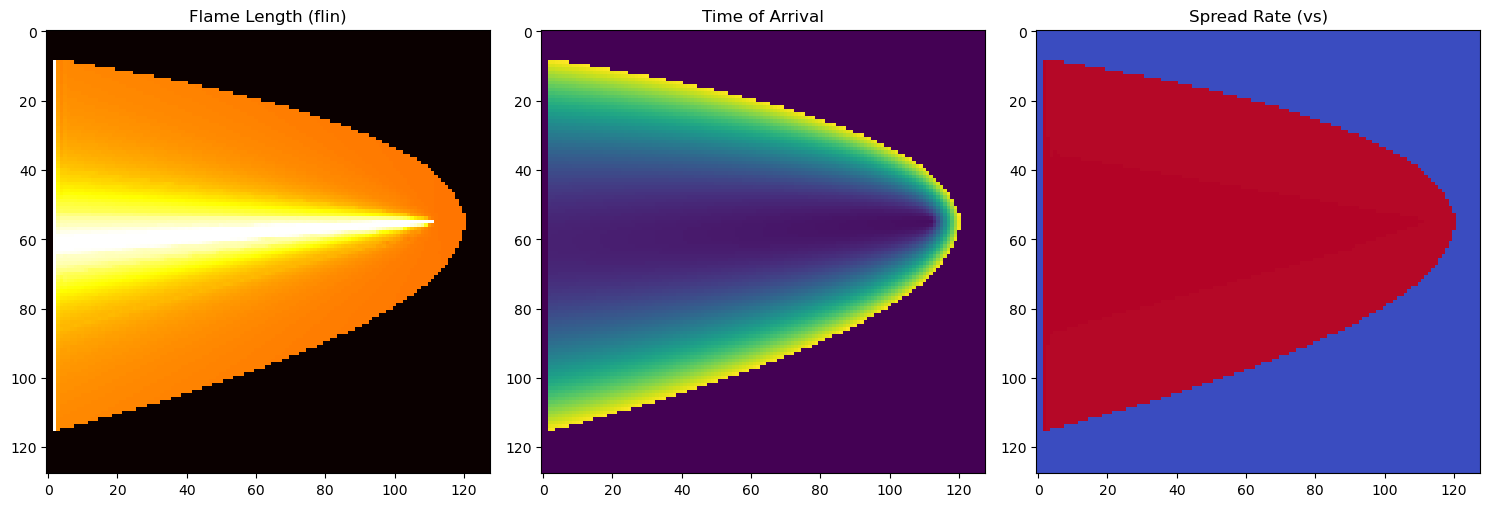

In [4]:
analysis_fcns.plot_case(5)

Plotting all cases for raster pattern: flin_*.tif


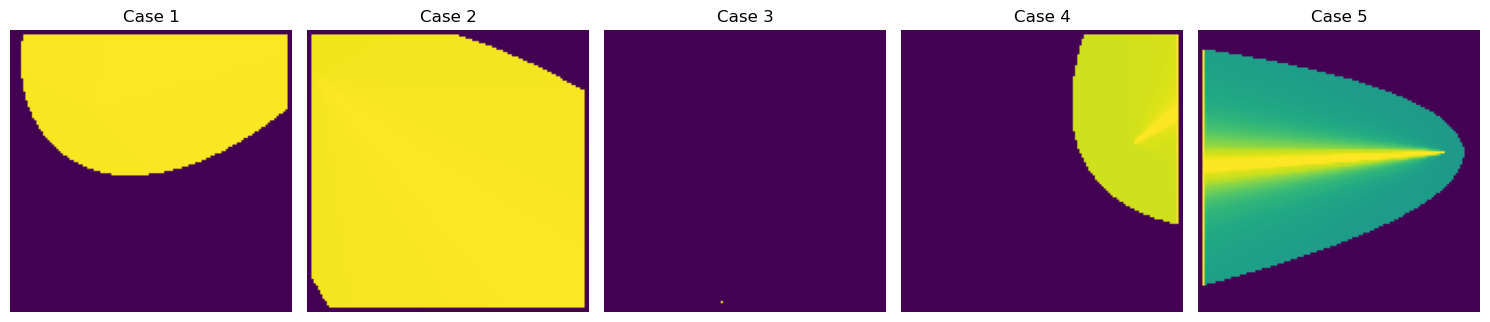

In [5]:
patterns = ["flin_*.tif", "time_of_arrival_*.tif", "vs_*.tif"]
analysis_fcns.plot_all_cases_raster('flin_*.tif', num_cases)

Input parameters distribution from input_tracking.txt:
                run          xign          yign          fuel           slp  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean    5000.000000     -1.514219     19.787951      8.014499     22.734227   
std     2887.184355   1117.599845   1110.254597      4.316328     13.260489   
min        0.000000  -1919.900000  -1920.000000      1.000000      0.000000   
25%     2500.000000   -974.600000   -955.100000      4.000000     11.000000   
50%     5000.000000    -10.700000     26.600000      8.000000     23.000000   
75%     7500.000000    963.300000    982.700000     12.000000     34.000000   
max    10000.000000   1919.400000   1919.600000     15.000000     45.000000   

                asp            ws            wd            m1           m10  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean     180.465953     15.488171    177.139336     20.846205     21.016718

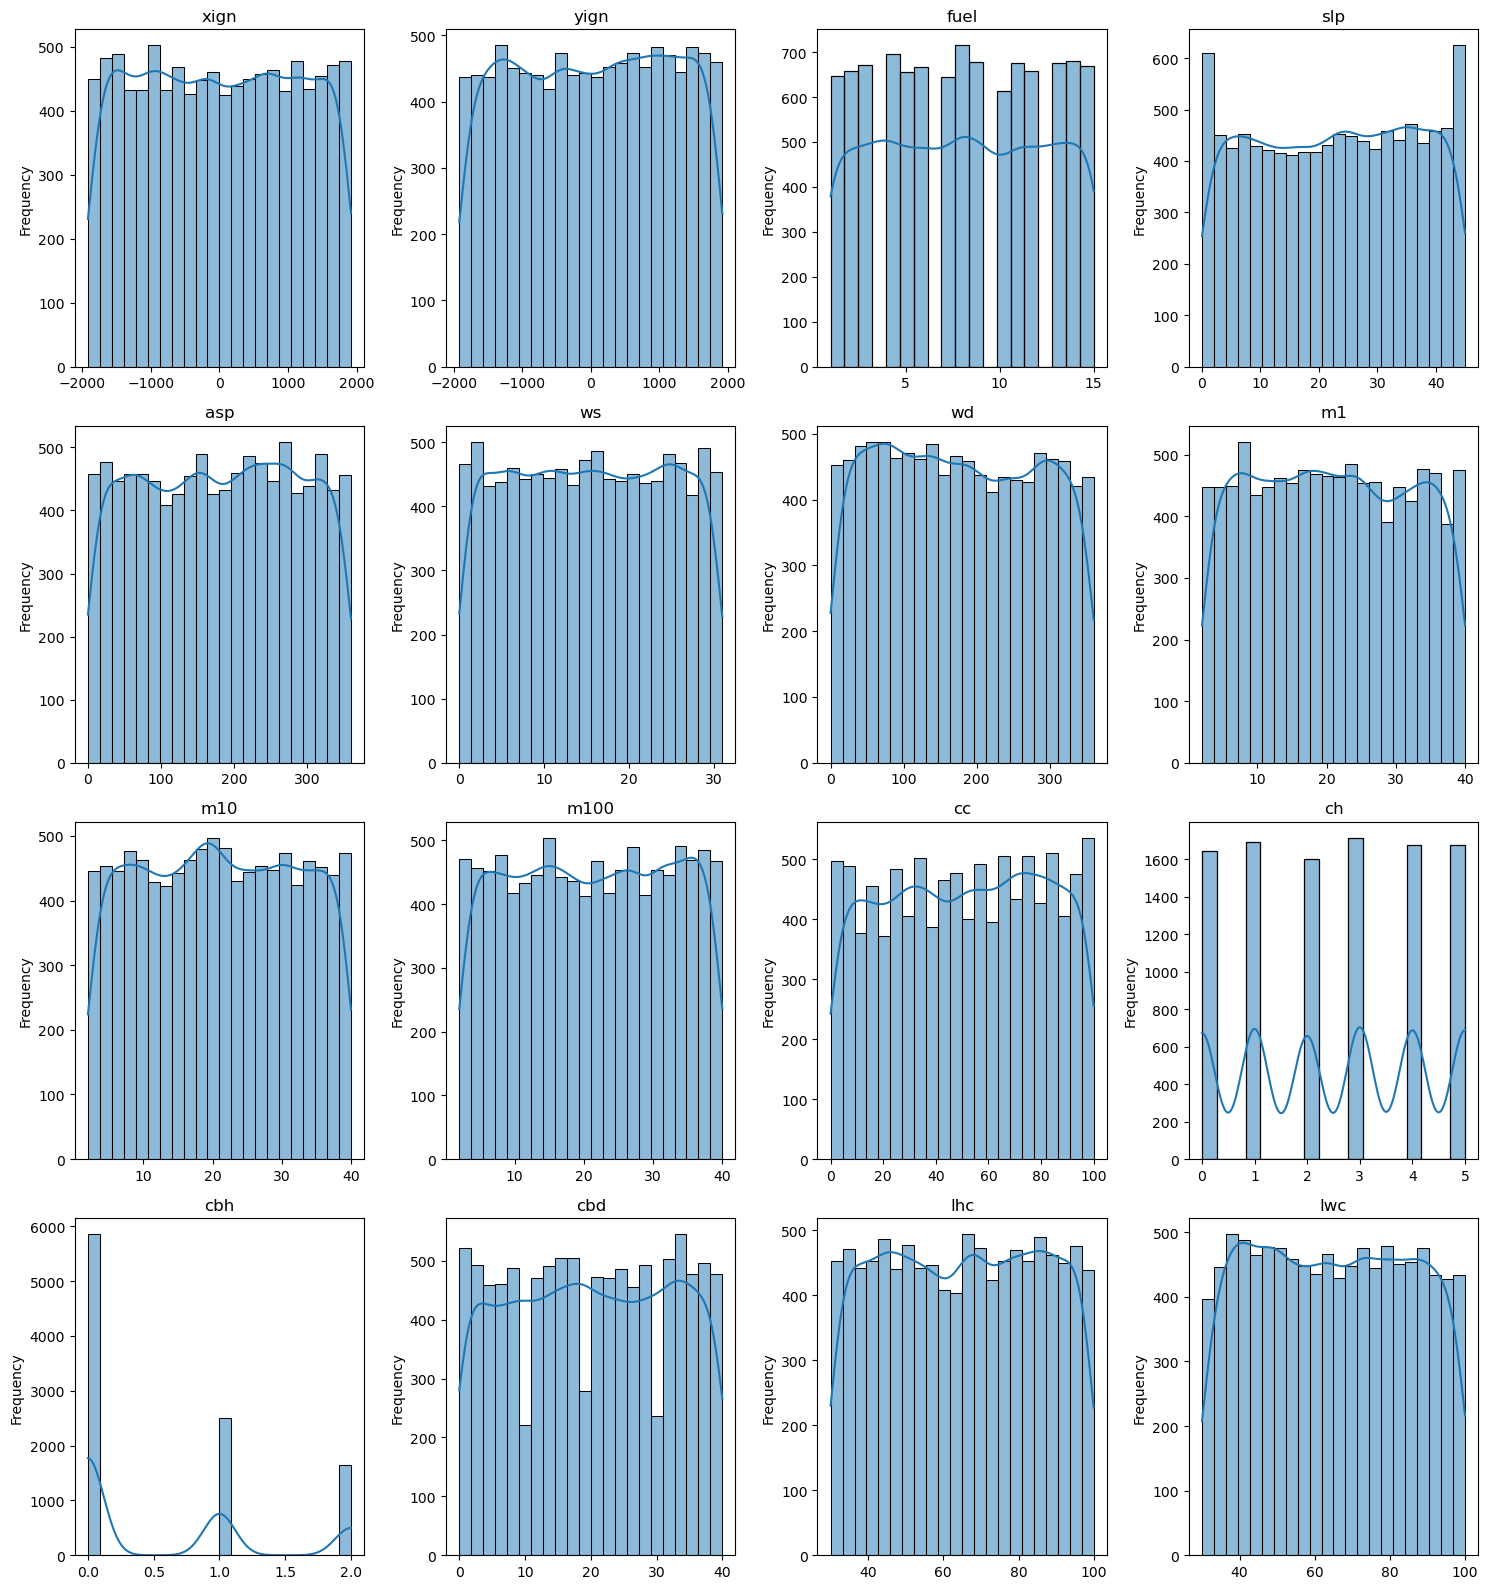

In [6]:
analysis_fcns.plot_input_distribution()

Input parameters vs Run number from input_tracking.txt:
                run          xign          yign          fuel           slp  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean    5000.000000     -1.514219     19.787951      8.014499     22.734227   
std     2887.184355   1117.599845   1110.254597      4.316328     13.260489   
min        0.000000  -1919.900000  -1920.000000      1.000000      0.000000   
25%     2500.000000   -974.600000   -955.100000      4.000000     11.000000   
50%     5000.000000    -10.700000     26.600000      8.000000     23.000000   
75%     7500.000000    963.300000    982.700000     12.000000     34.000000   
max    10000.000000   1919.400000   1919.600000     15.000000     45.000000   

                asp            ws            wd            m1           m10  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean     180.465953     15.488171    177.139336     20.846205     21.01671

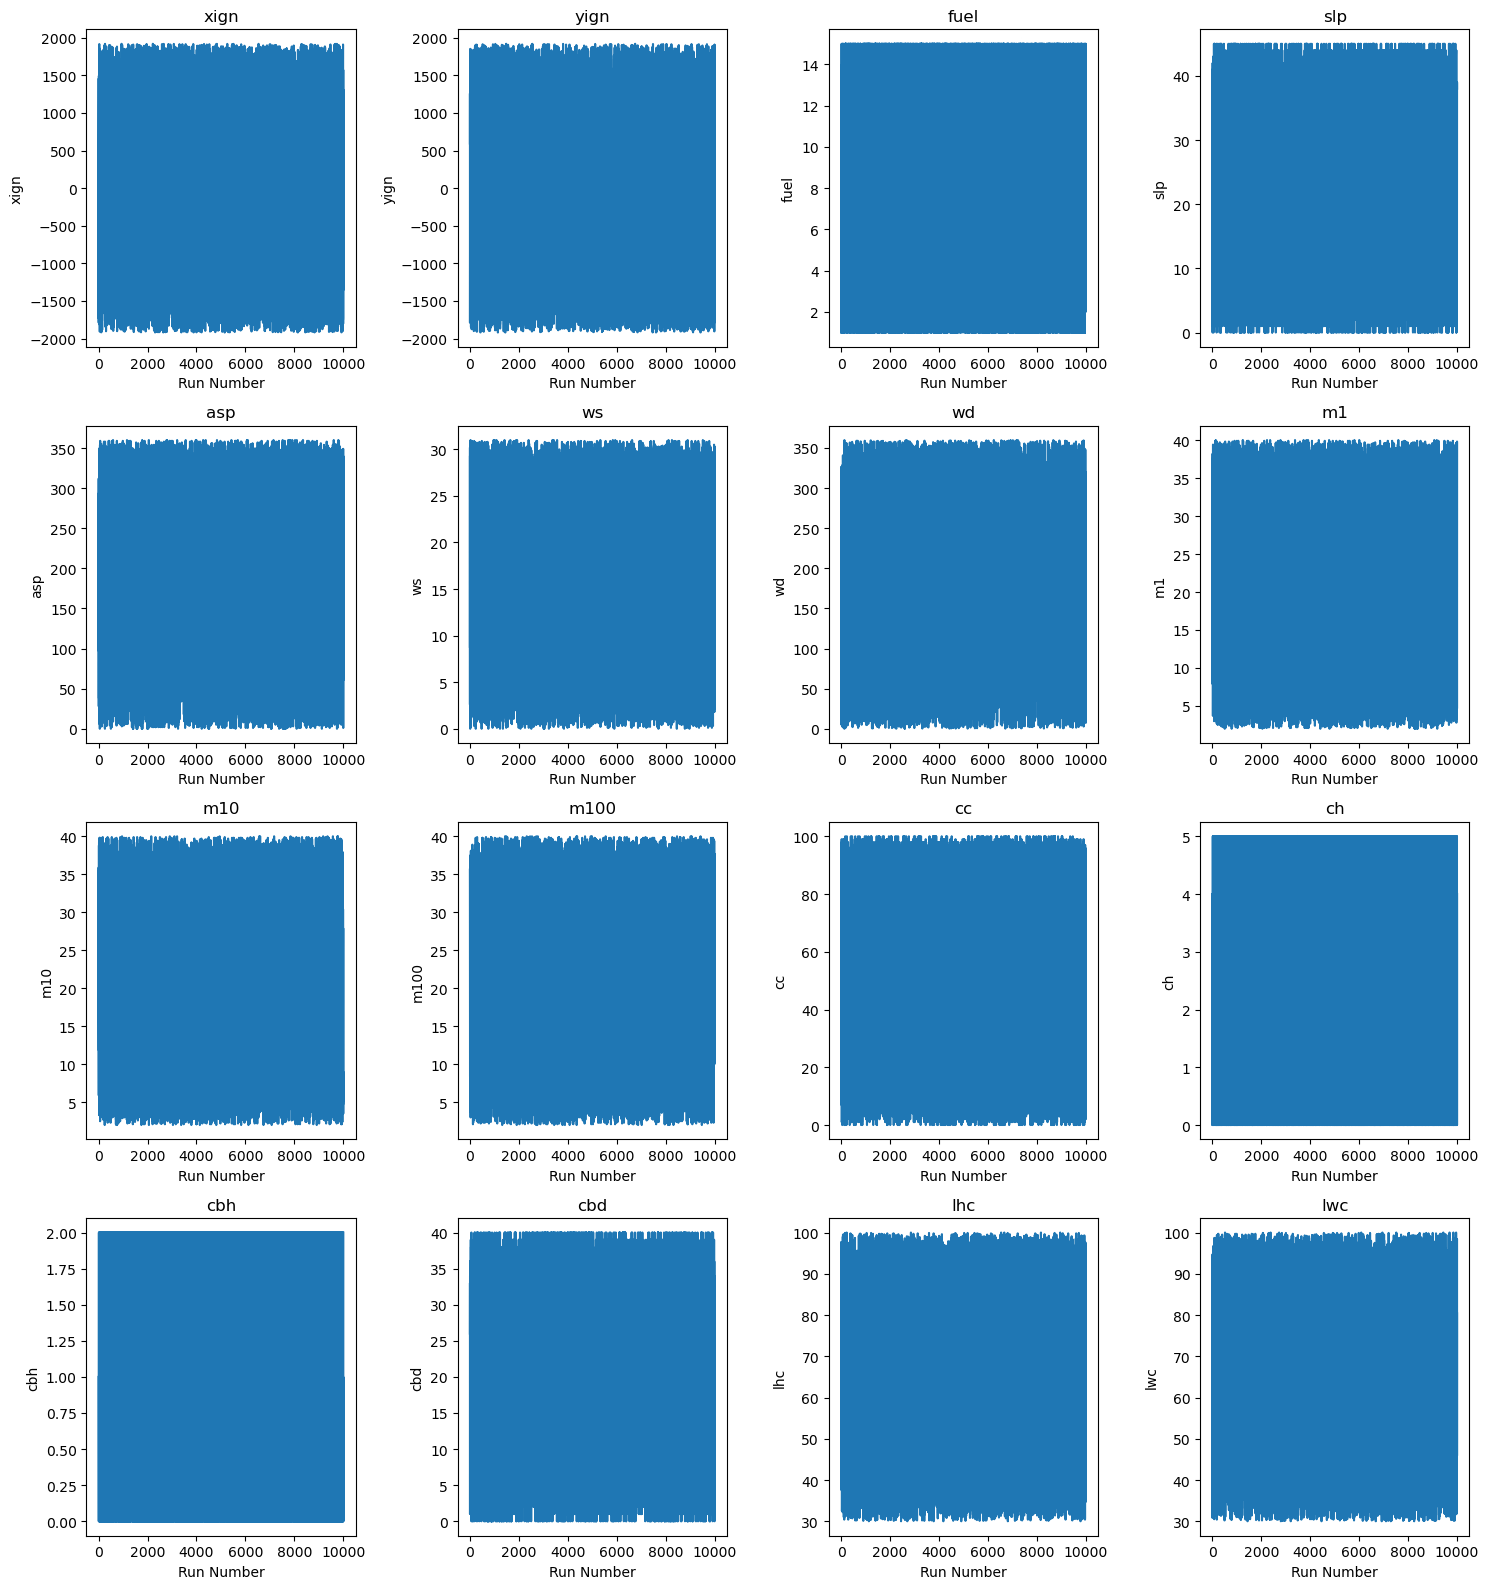

In [7]:
analysis_fcns.plot_input_vs_run()

In [8]:
# quick check to make sure all of the input parameters are within the expected ranges
analysis_fcns.check_input_ranges()


Checking input parameter ranges from input_tracking.txt:
Index(['run', 'xign', 'yign', 'fuel', 'slp', 'asp', 'ws', 'wd', 'm1', 'm10',
       'm100', 'cc', 'ch', 'cbh', 'cbd', 'lhc', 'lwc', 'firearea'],
      dtype='object')
fuel values are within the expected range: 1 to 40
slp values are within the expected range: 0 to 45
asp values are within the expected range: 0 to 360
ws values are within the expected range: 0 to 31
wd values are within the expected range: 0.0 to 360.0
m1 values are within the expected range: 1.0 to 40.0
m10 values are within the expected range: 1.0 to 40.0
m100 values are within the expected range: 1.0 to 40.0
cc values are within the expected range: 0 to 100
ch values are within the expected range: 0 to 5
cbh values are within the expected range: 0 to 2
cbd values are within the expected range: 0 to 40
lhc values are within the expected range: 30.0 to 100.0
lwc values are within the expected range: 30.0 to 100.0
firearea values are within the expected range: 0 t

Analyzing fire area from input_tracking.txt:
Fire area statistics:
count    10001.000000
mean       683.091041
std       1082.162997
min          0.000000
25%          0.200000
50%         13.800000
75%        997.700000
max       3419.500000
Name: firearea, dtype: float64


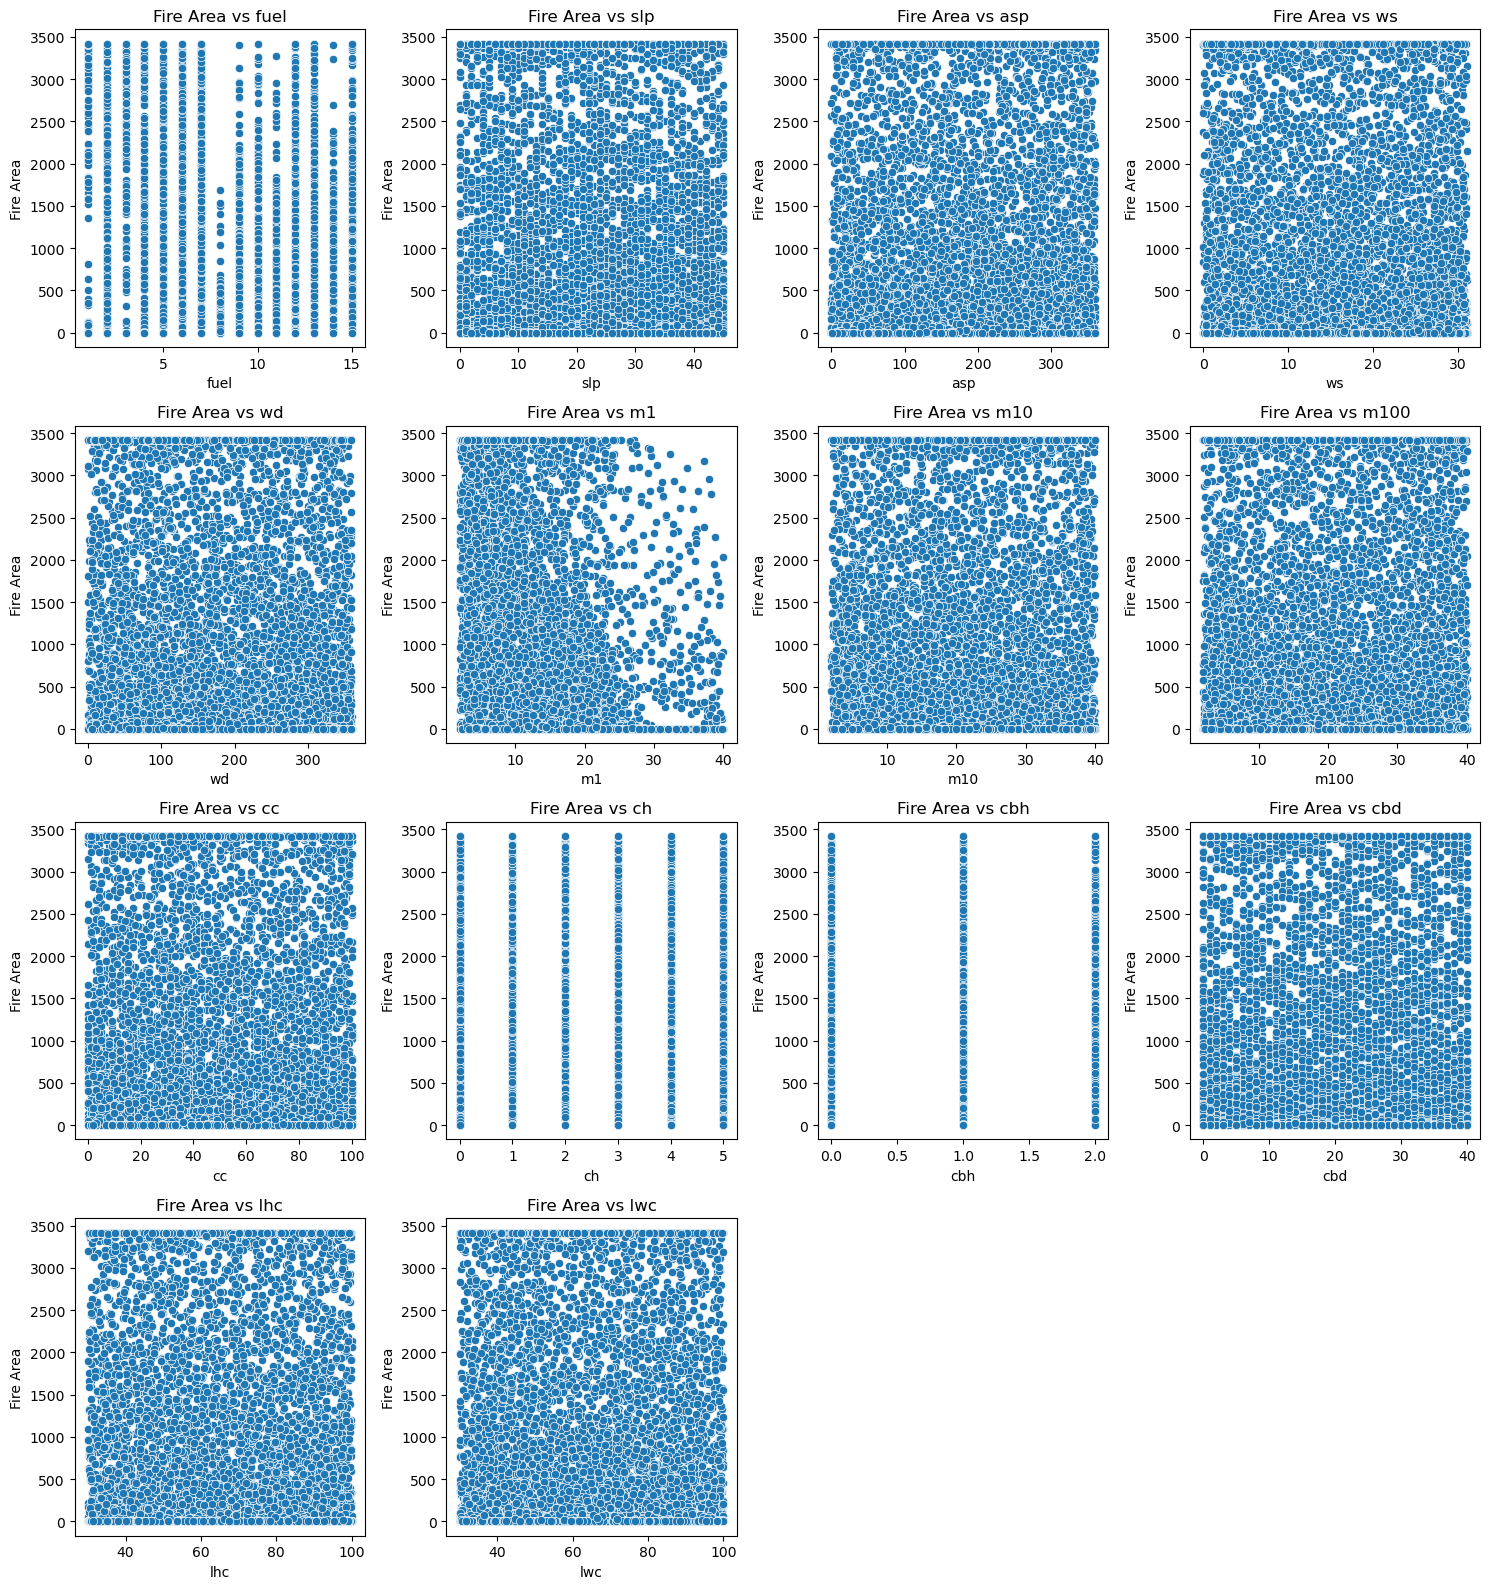

In [9]:
# analyze fire area
analysis_fcns.analyze_fire_area()

In [10]:
analysis_fcns.fire_area_covariance()

Calculating fire area covariance from input_tracking.txt:
Covariance between fire area and fuel: -1029.2459700929908
Covariance between fire area and slp: -296.4626013298668
Covariance between fire area and asp: 180.24548494250348
Covariance between fire area and ws: -250.3917319862015
Covariance between fire area and wd: 352.4823074511548
Covariance between fire area and m1: -6396.966038999801
Covariance between fire area and m10: -364.18248220377944
Covariance between fire area and m100: 71.36545274942506
Covariance between fire area and cc: -1045.6014317908198
Covariance between fire area and ch: -10.80849473052697
Covariance between fire area and cbh: -6.931409991000896
Covariance between fire area and cbd: -101.45853327167315
Covariance between fire area and lhc: -137.2623367177283
Covariance between fire area and lwc: -344.18430797770213


{'fuel': np.float64(-1029.2459700929908),
 'slp': np.float64(-296.4626013298668),
 'asp': np.float64(180.24548494250348),
 'ws': np.float64(-250.3917319862015),
 'wd': np.float64(352.4823074511548),
 'm1': np.float64(-6396.966038999801),
 'm10': np.float64(-364.18248220377944),
 'm100': np.float64(71.36545274942506),
 'cc': np.float64(-1045.6014317908198),
 'ch': np.float64(-10.80849473052697),
 'cbh': np.float64(-6.931409991000896),
 'cbd': np.float64(-101.45853327167315),
 'lhc': np.float64(-137.2623367177283),
 'lwc': np.float64(-344.18430797770213)}

Calculating fire area correlation from input_tracking.txt:
Correlation coefficients with fire area:
run    -0.007675
xign   -0.004776
yign   -0.006677
fuel   -0.220349
slp    -0.020659
asp     0.001599
ws     -0.025761
wd      0.003134
m1     -0.540968
m10    -0.030760
m100    0.005952
cc     -0.033086
ch     -0.005850
cbh    -0.008461
cbd    -0.007914
lhc    -0.006252
lwc    -0.015851
Name: firearea, dtype: float64


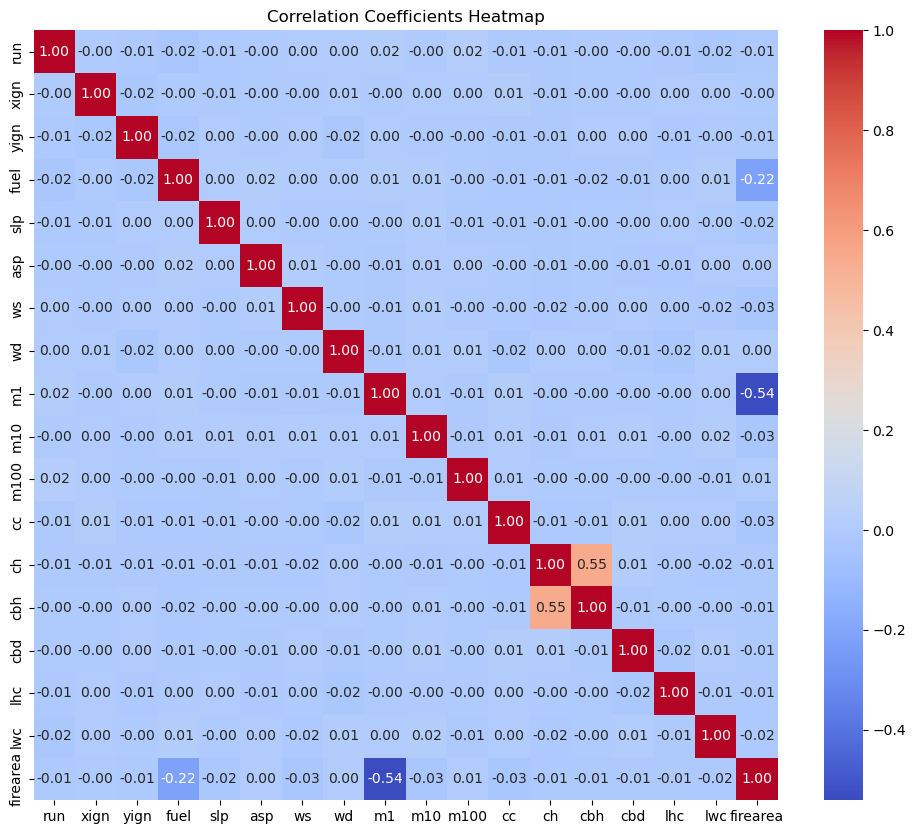

run    -0.007675
xign   -0.004776
yign   -0.006677
fuel   -0.220349
slp    -0.020659
asp     0.001599
ws     -0.025761
wd      0.003134
m1     -0.540968
m10    -0.030760
m100    0.005952
cc     -0.033086
ch     -0.005850
cbh    -0.008461
cbd    -0.007914
lhc    -0.006252
lwc    -0.015851
Name: firearea, dtype: float64

In [11]:
analysis_fcns.fire_area_correlation()

Plotting top 15 cases with the most fire area from input_tracking.txt (excluding fire area == 3419.5):
Top 15 cases with the most fire area:
       run  firearea
5504  5504    3419.3
5627  5627    3419.3
5918  5918    3419.3
7674  7674    3419.3
8955  8955    3419.3
6315  6315    3419.1
9340  9340    3419.1
871    871    3418.9
1741  1741    3418.9
3065  3065    3418.9
5794  5794    3418.9
7698  7698    3418.9
1079  1079    3418.6
1520  1520    3418.6
2315  2315    3418.6
./cases/case_5504
./cases/case_5627
./cases/case_5918
./cases/case_7674
./cases/case_8955
./cases/case_6315
./cases/case_9340
./cases/case_871
./cases/case_1741
./cases/case_3065
./cases/case_5794
./cases/case_7698
./cases/case_1079
./cases/case_1520
./cases/case_2315


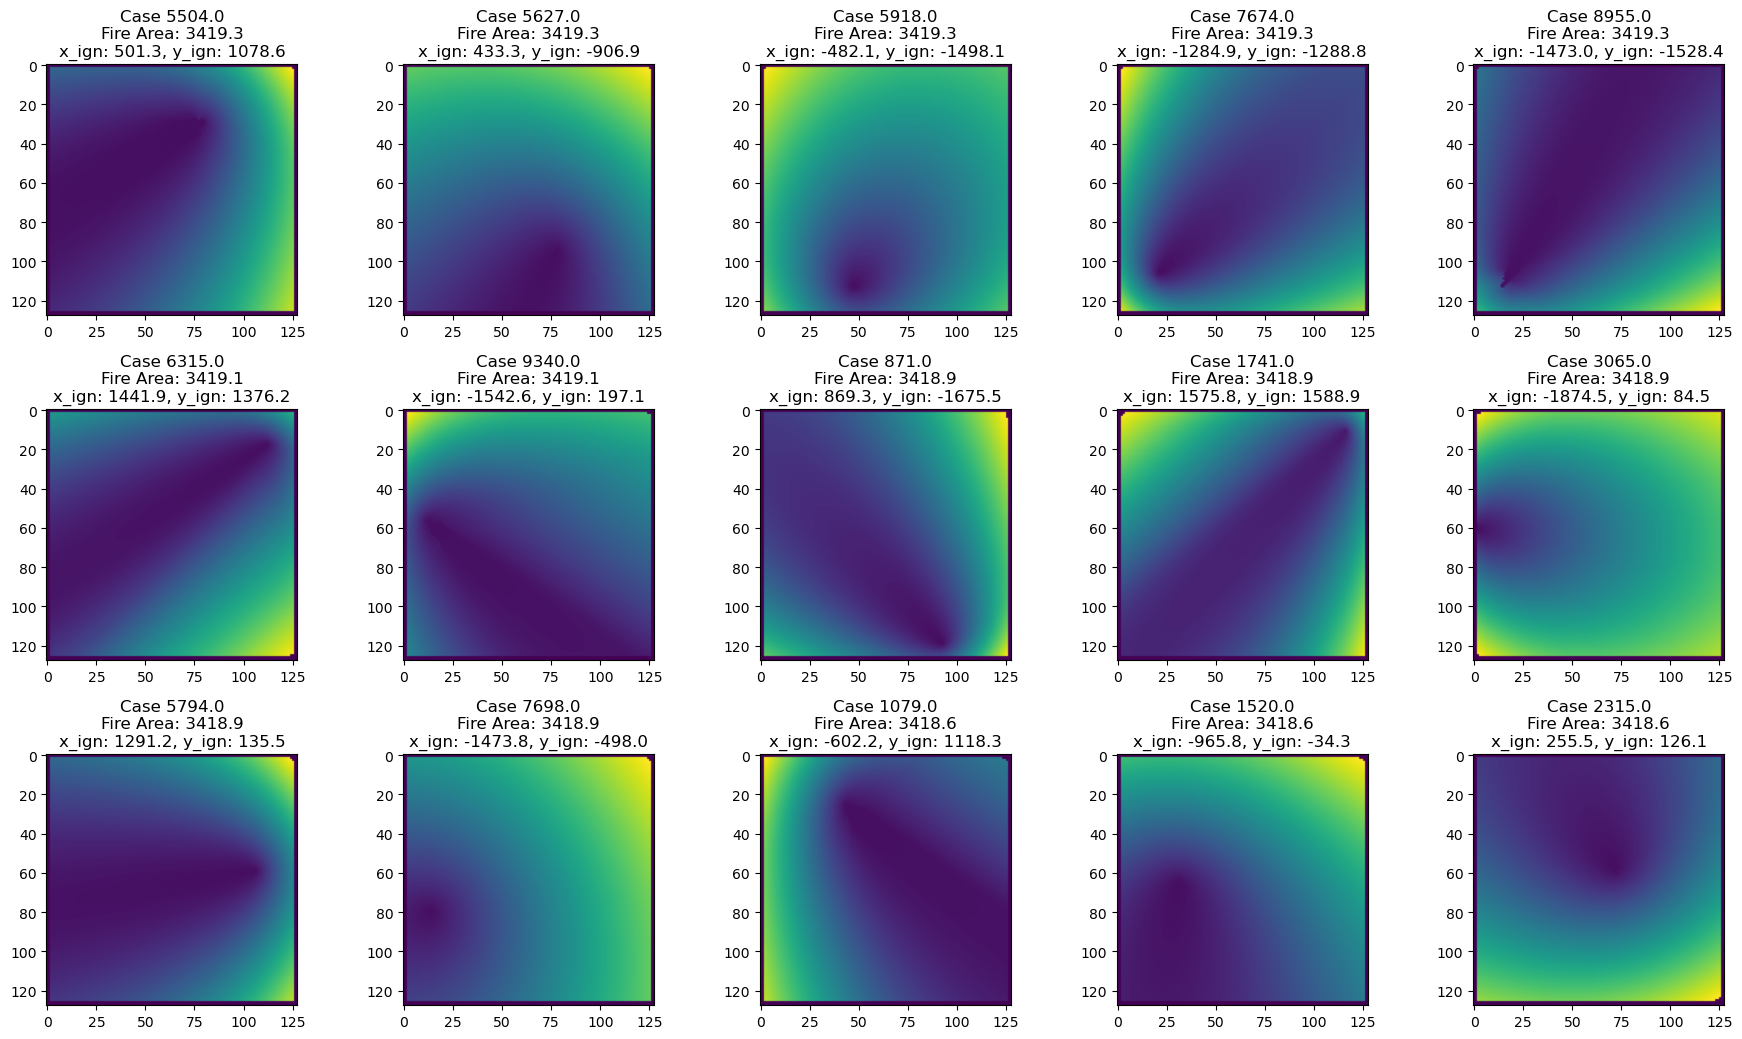

In [12]:
# select 15 cases that have the most fire area
import analysis_fcns
analysis_fcns.plot_top_fire_area_cases(15)

Plotting cases with zero fire area from input_tracking.txt:
Cases with <= 100 fire area:
       run    xign    yign  firearea
3        3  -315.3 -1788.7       0.2
6        6   -43.2  -869.6       0.2
9        9   952.8  -203.3       0.2
12      12  -489.3     1.2      12.9
13      13  -806.6 -1274.8       0.2
...    ...     ...     ...       ...
9993  9993 -1802.5   803.1       0.2
9994  9994   -31.3   612.3       0.2
9996  9996 -1358.6  -406.0       0.2
9997  9997   511.7  1907.0       0.0
9998  9998  1308.1  -212.8       0.2

[5635 rows x 4 columns]


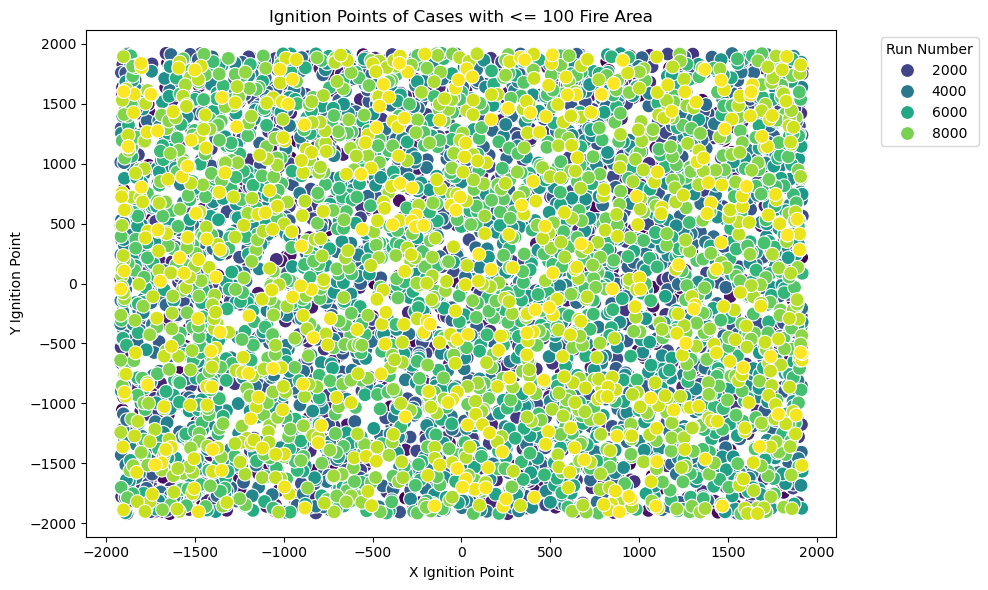

In [13]:
import analysis_fcns
analysis_fcns.plot_zero_fire_cases(firearea_threshold=100)

Plotting fire area against each input parameter from input_tracking.txt:


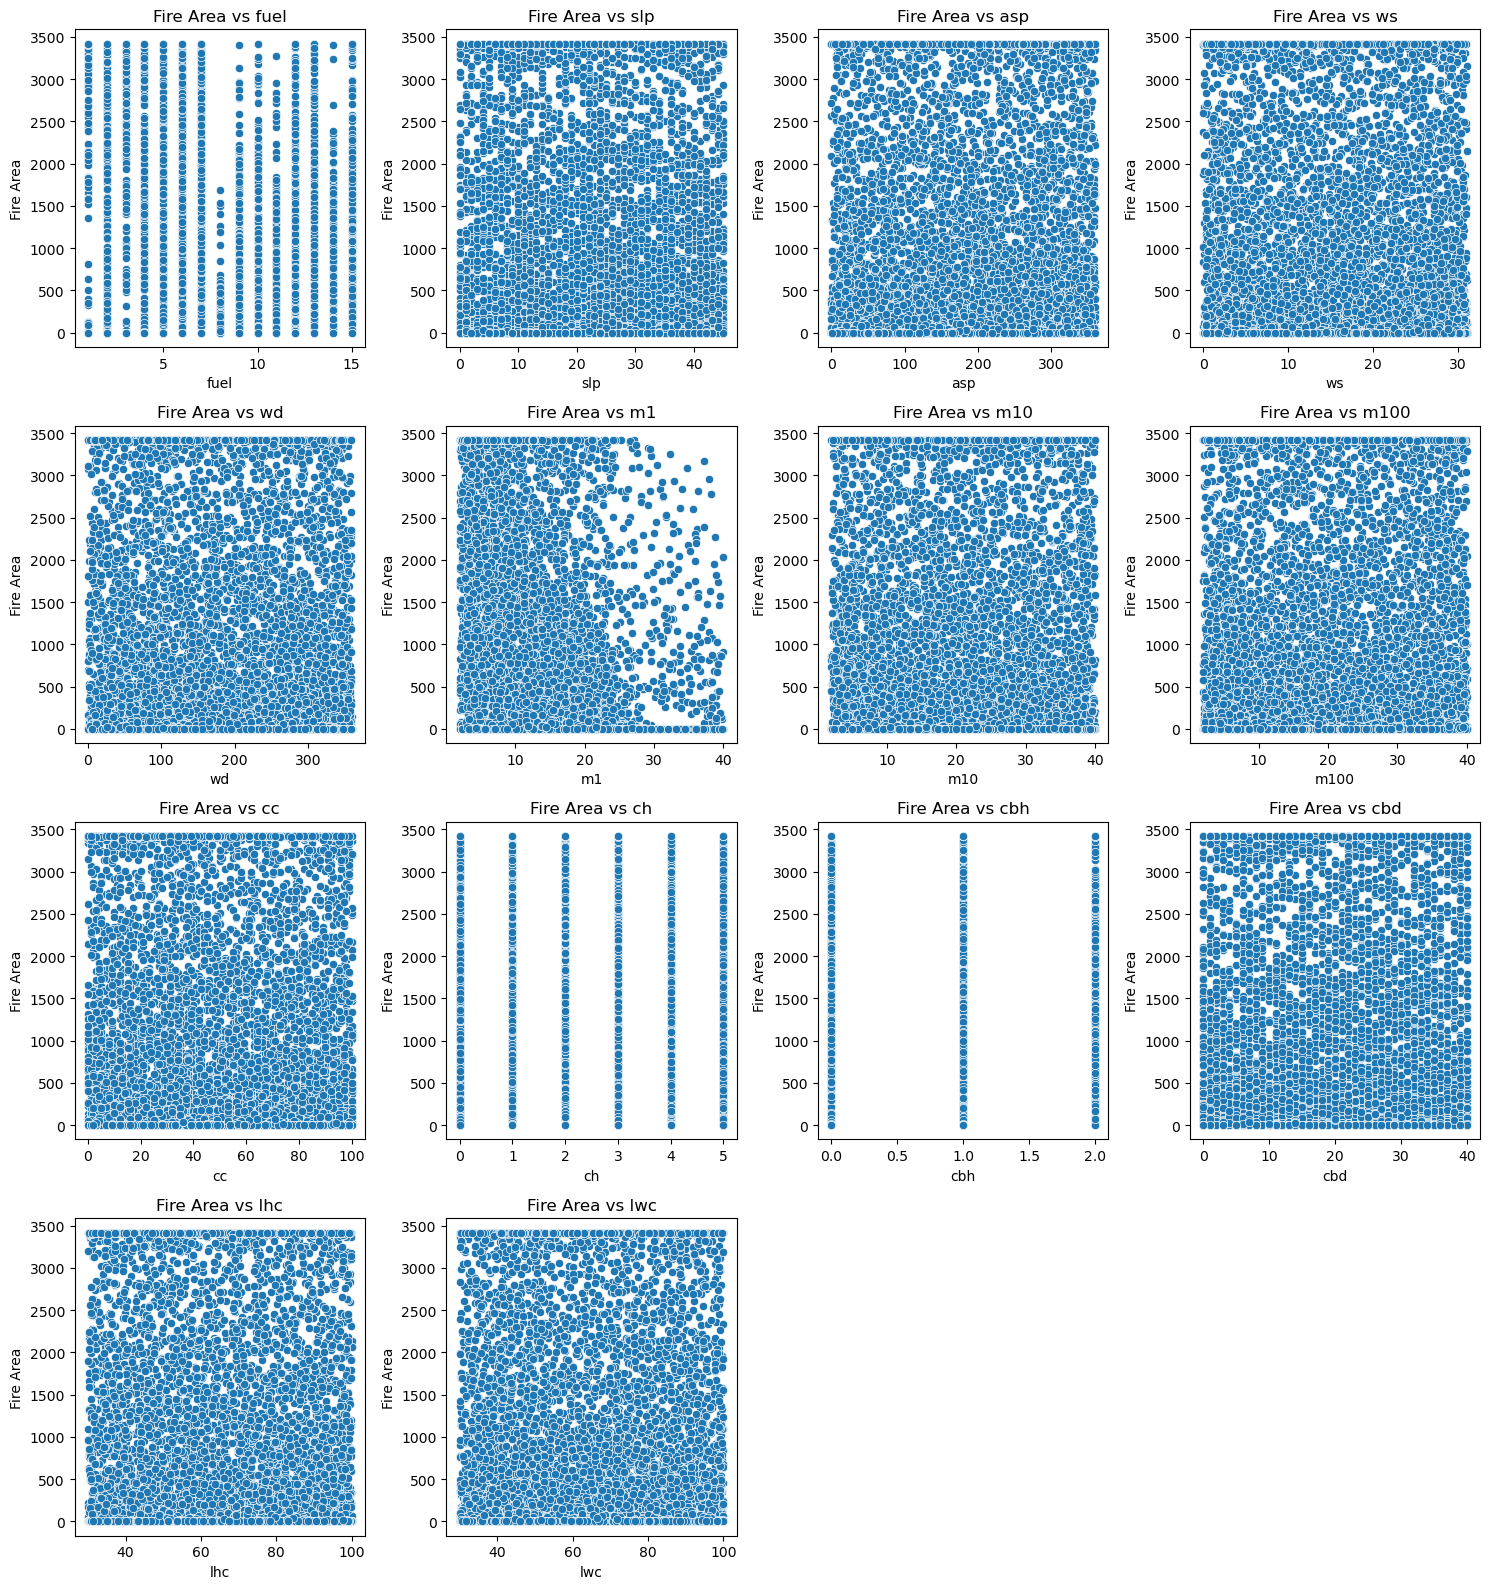

In [14]:
import analysis_fcns
analysis_fcns.plot_fire_area_vs_inputs()

In [15]:
import analysis_fcns
analysis_fcns.max_fuel_model_fire_area()

Finding maximum fuel model with fire area from input_tracking.txt:
Maximum fuel model with fire area > 0: 15


np.int64(15)

Plotting distribution of fuel for cases with fire area under 100 from input_tracking.txt:
Number of cases with fire area <= 100: 5635


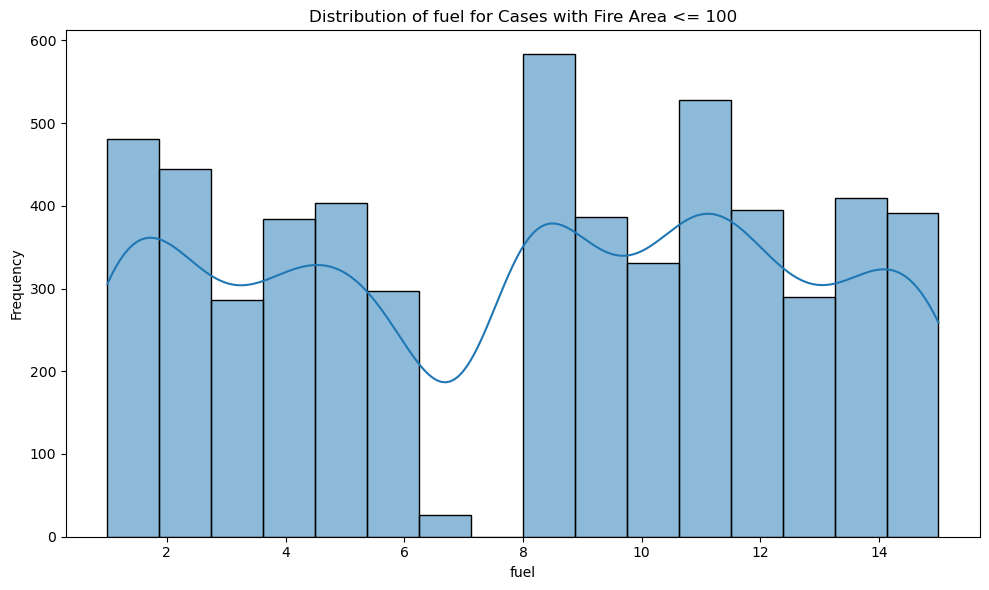

In [16]:
import analysis_fcns
analysis_fcns.plot_var_dist_for_firearea_underthreshold(variable='fuel',threshold=100)